Menu
	1. One player
	2. Two players
	3. Statistics
	4. Out



Chose an option form 1 to 4 to start the game 
 3


Statistics
   Unnamed: 0   Name  Points  Ranking  Percentage
0           2    fre    1000        1    0.571429
1           0    nam     500        2    0.285714
2           1  clara     250        3    0.142857
['fre', 'nam', 'clara']


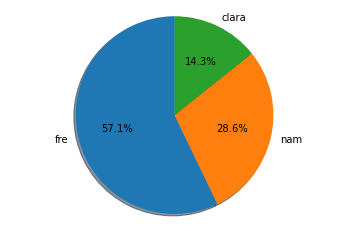

In [39]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
from random import *
import ipywidgets as widgets
from getpass import getpass
from IPython.display import display
import xlsxwriter as xw
from openpyxl import Workbook

dict_results={'Name':[],'Points':[]}

def menu():
    global dict_results
    global N_players
    #global name
    
    #option = "Chose an option form 1 to 4 to start the game \n"
    #print('Chose an option')
    print("Menu")
    print("\t1. One player")
    print("\t2. Two players")
    print("\t3. Statistics")
    print("\t4. Out")
   
    option = int(input("\nChose an option form 1 to 4 to start the game \n"))

    while option < 1 or option > 4:
        print("\n Invalid option. Chose another option form 1 to 4 to start the game \n ")      
        option = int(input())

    if option == 1:
        print("Single player. Let's go!")
        N_players=1
        level_selector(N_players)
    elif option == 2:
        print("Two players. Let's go")
        N_players=2
        level_selector(N_players)
    elif option == 3:
        print('Statistics')
        statictics()
        #print(dict_results)
    elif option == 4:
        to_excel(dict_results)
        print('Goodbye!')
        sys.exit()
        

    
def level_selector(N_players):  
    #©
    select_level = ""  
    print("Chose a level")
    
    print("\t1.Easy: 20 attempts")
    print("\t2.Medium: 12 attempts")
    print("\t3.Difficult: 5 attempts")
    select_level = int(input())
    
    while select_level < 1 or select_level > 3:
        print("\nInvalid selection\n")
      
        select_level = int(input('Select a level '))
    # generate the random number once per loop
    if select_level == 1:
        print('Easy level')
        game(N_players,20)
    if select_level == 2:
        print('Medium level')
        game(N_players,12)
    if select_level == 3:
        print('Difficult level')
        game(N_players,5)
    

        

        
def game(N_players,max_attempt):
    global dict_results
   # global name
    #global N_players
    #for p in range(N_players):
    print('Enter your name')
    name = input()
    if N_players==1:
        num= randint(1,1000)
        print("The number to guess is: \n ")
        print(num)
    elif N_players==2:
        print('Number to attempt in range of 1 to 1000')       
        num=int(getpass())
        while num not in range(1,1000):
            print('number unaccepted. Try again!')
            num=int(getpass())
        else:
            print('number accepted')
            
    else:
        pass
            
    total_point=0

    print('Input your number')
    playerNum=int(input())
    
    k=1 # attempt times    
    while k<=max_attempt:       
        if playerNum > num:
            print('Expected number is smaller than your number. Try again!')
            playerNum = int(input())
            k+=1
        elif playerNum < num:
            print('Expected number is larger than your number. Try again!')
            playerNum=int(input())
            k+=1
        else:
            print(str(playerNum) +' is correct number. Congratulations!')
            
            total_point=int(1000/k)
            print('You get '+ str(total_point))
            print('Continue playing?')
            dict_results['Name'].append(name)
            dict_results['Points'].append(total_point)
            menu()
          

    else:
        print('Game Over')
        print('You get '+ str(total_point))
        dict_results['Name'].append(name)
        dict_results['Points'].append(total_point)
        
        print('Do you want to continue playing?')
        menu()
   # menu()


def to_excel(dict_results=dict_results):
    
    #df_results=pd.DataFrame.from_dict(dict_results)
    df_results=pd.DataFrame(dict_results)
    #df_results = df_results.sort_values(by='Points')
    #df_results.to_excel("results.xlsx", index=False)
    
    # create excel writer object
    writer = pd.ExcelWriter('output.xlsx')
    # write dataframe to excel
    df_results.to_excel(writer)
    # save the excel
    writer.save()
    print(df_results)
    print('DataFrame is written successfully to Excel File.')

    
def statictics():
    df=pd.read_excel('output.xlsx')
    df = df.sort_values(by='Points',ascending=False)
    df.reset_index(drop = True, inplace = True)  
    df.insert(len(df.columns), 'Ranking', df.index+1)
    df.insert(len(df.columns), 'Percentage', df['Points']/df['Points'].sum())       
    print(df)
   
    labels = [df['Name'].loc[i] for i in range(len(df['Name']))] 
    sizes = [df['Percentage'].loc[i] for i in range(len(df['Percentage']))]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

    

menu()

     


In [20]:
dict_results


{'Name': ['n'], 'Points': [1000]}